In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

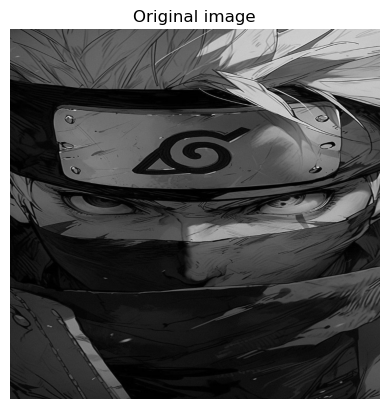

In [2]:
image = cv2.imread("C:\\Users\\Kuldeep Solanki\\Desktop\\images\\KAKASHI.jpg",0)
image = cv2.resize(image,(1000,1000))
plt.title("Original image")
plt.axis('off')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

# Gray-level and intencity slicing

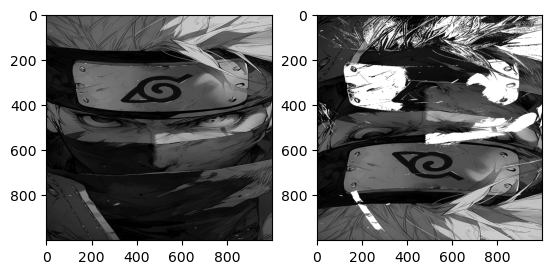

In [3]:
row, column = image.shape

img1 = np.zeros((row,column),dtype = 'uint8')
min_range = 100
max_range = 200

for i in range(row):
    for j in range(column):
        if image[i,j]>min_range and image[i,j]<max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = image[1-i,j-1]
            
plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_RGB2BGR))


# bit-plane slicing

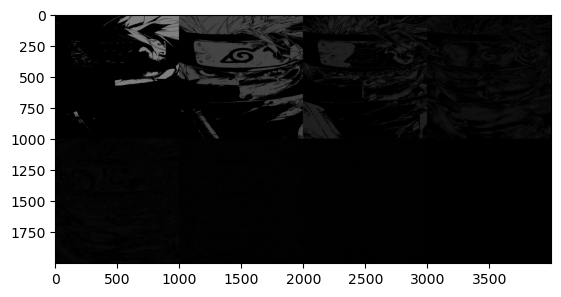

In [4]:
h,w = image.shape

bin=[]

for i in range(h):
    for j in range(w):
        bin.append(np.binary_repr(image[i,j],width=8))

eight = (np.array([int(i[0]) for i in bin],dtype=np.uint8)*128).reshape(image.shape[0],image.shape[1])
seven = (np.array([int(i[1]) for i in bin],dtype=np.uint8)*68).reshape(image.shape[0],image.shape[1])
six = (np.array([int(i[2]) for i in bin],dtype=np.uint8)*32).reshape(image.shape[0],image.shape[1])
five = (np.array([int(i[3]) for i in bin],dtype=np.uint8)*16).reshape(image.shape[0],image.shape[1])
four = (np.array([int(i[4]) for i in bin],dtype=np.uint8)*8).reshape(image.shape[0],image.shape[1])
three = (np.array([int(i[5]) for i in bin],dtype=np.uint8)*4).reshape(image.shape[0],image.shape[1])
two = (np.array([int(i[6]) for i in bin],dtype=np.uint8)*2).reshape(image.shape[0],image.shape[1])
one = (np.array([int(i[7]) for i in bin],dtype=np.uint8)*1).reshape(image.shape[0],image.shape[1])

upper = cv2.hconcat([eight,seven,six,five])
lower = cv2.hconcat([four,three,two,one])

full = cv2.vconcat([upper,lower])

plt.imshow(cv2.cvtColor(full,cv2.COLOR_RGB2BGR))

# Box-plot 

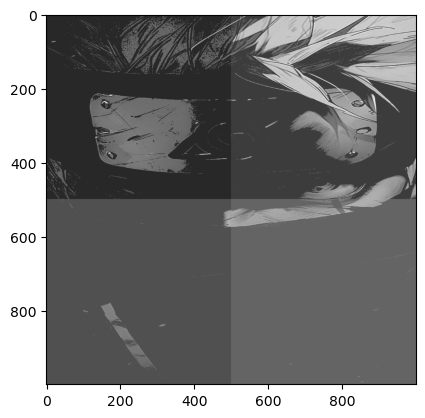

In [5]:
h,w = image.shape

for i in range(h):
    for j in range(w):
        if i<=500 and j<=500:
            if image[i,j]<100:
                image[i,j]=40
        if i<=500 and j>=500:
            if image[i,j]<100:
                image[i,j]=60
        if i>=500 and j<=500:
            if image[i,j]<100:
                image[i,j]=80
        if i>=500 and j>=500:
            if image[i,j]<100:
                image[i,j]=100

plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

# Histogram equalizer

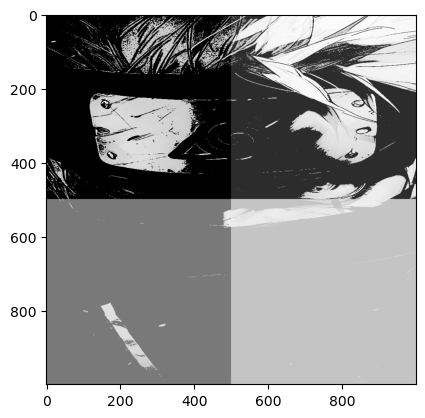

In [6]:
hist_eq = cv2.equalizeHist(image)

plt.imshow(cv2.cvtColor(hist_eq,cv2.COLOR_RGB2BGR))